# Freight Rates API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/FreightRatesAPI/FreightRatesAPI.ipynb) 

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [ ]:
pip install signal-ocean

In [13]:
signal_ocean_api_key = '' #replace with your subscription key

## Freight Rates API
The Freight Rates API retrieves freight costs breakdown for a given load,
discharge port and vessel class. First create connection towards
Freight Rates API in order to find available ports and vessel classes:

In [14]:
from signal_ocean import Connection, FreightRatesAPI
from signal_ocean.freight_rates import PortFilter

connection = Connection(api_key=signal_ocean_api_key)
fr_api = FreightRatesAPI(connection)

#### Find available ports and vessel classes
Now retrieve the available vessel classes and look if specific ports are available.
If you want to get all the available ports do not pass any parameter to the
corresponding method.

In [15]:
vessel_classes = fr_api.get_vessel_classes()
print(vessel_classes)

('VLCC', 'Suezmax', 'Aframax', 'PanamaxTanker', 'MR2', 'MR1')


#### Get freight rates for specific ports and vessel class
In this example we retrieve today’s freight rate for Clean Panamax Amsterdam - Lome:

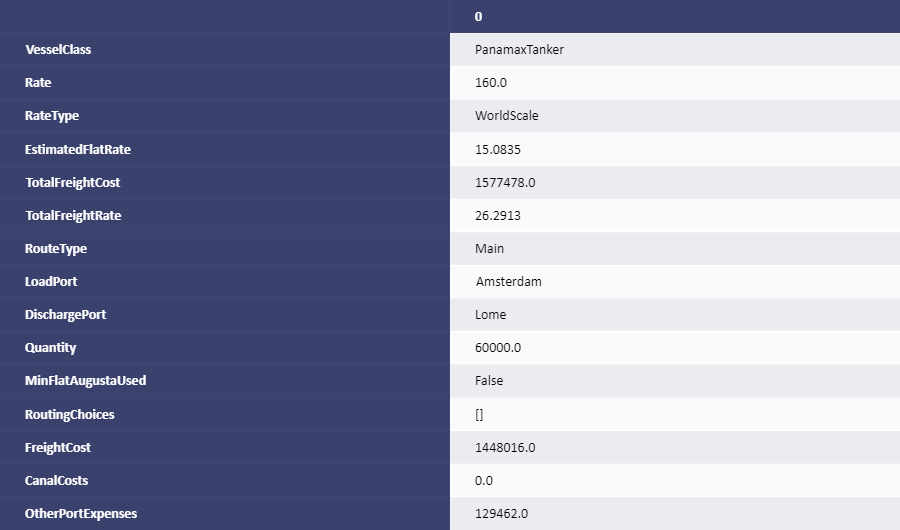

In [16]:
from signal_ocean.freight_rates.utils import create_dataframe
from signal_ocean.plots import styled_table, line_chart

amsterdam = fr_api.get_ports(PortFilter(name_like='Amsterdam'))[0]
lome = fr_api.get_ports(PortFilter(name_like='Lome'))[0]
fr = fr_api.get_freight_pricing(load_port_id=amsterdam.id,
                                discharge_port_id=lome.id,
                                vessel_classes=["PanamaxTanker"],
                                is_clean=True)
df = create_dataframe(fr)
styled_table(df.T)

We can also plot the freight rates for the same combination from 1st of January
until today:

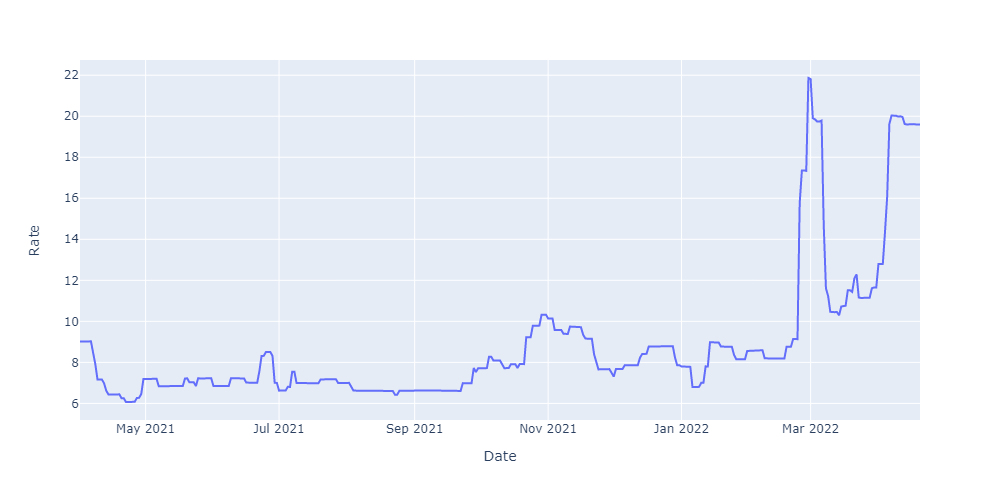

In [17]:
from datetime import date, timedelta
import pandas as pd

dates = [date(2021, 4, 1) + timedelta(days=i) for i in
         range((date.today()-date(2021, 4, 1)).days + 1)]
cpc = fr_api.get_ports(PortFilter(name_like='CPC'))[0]
augusta = fr_api.get_ports(PortFilter(name_like='Augusta'))[0]
rates = []

for day in dates:
    frates = fr_api.get_freight_pricing(load_port_id=cpc.id,
                                        discharge_port_id=augusta.id,
                                        vessel_classes=["Aframax"],
                                        is_clean=False,
                                        date=day)
    rates.append(frates[0].total_freight_rate)

df = pd.DataFrame({'Date':dates,'Rate':rates})

line_chart(df,'Date','Rate')